In [422]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt
import math

In [423]:
L1dat = np.load('hackathon-three-cities_all_data_L1.npy')

In [424]:
test = genfromtxt('my_result.csv', delimiter=',')
L1res = genfromtxt('hackathon-three-cities_L1_horizons_train.csv', delimiter=',')
x = np.arange(1451)

In [425]:
for i in reversed(range(1512)):
    if math.isnan(L1res[i,2])==False:
        last=i-1
        break
for i in range(1512):
    if math.isnan(L1res[i,2])==False:
        start=i-1
        break
print(last)
print(start)

L1resint = np.around(L1res,decimals=-1)

maxim = 0
minim = 0
for i in range(start,last+1):
    if ((L1dat[i,int(L1resint[i+1,2]-1)] > L1dat[i,int(L1resint[i+1,2])])) and ((L1dat[i,int(L1resint[i+1,2]+1)] > L1dat[i,int(L1resint[i+1,2])])):
        minim = minim+1
    if ((L1dat[i,int(L1resint[i+1,2]-1)] < L1dat[i,int(L1resint[i+1,2])])) and ((L1dat[i,int(L1resint[i+1,2]+1)] < L1dat[i,int(L1resint[i+1,2])])):
        maxim = maxim+1
if maxim>minim:
    testmax = True
else:
    testmax = False

521
58


In [426]:
extr = []
for i in range(last+1,1453):
    for j in range(int(L1res[i-1,2])-100,int(L1res[i-1,2])+100):
        
        if ((testmax == True) and (L1dat[i,j-1] < L1dat[i,j]) and (L1dat[i,j+1] < L1dat[i,j])) or ((testmax == False) and (L1dat[i,j-1] > L1dat[i,j]) and (L1dat[i,j+1] > L1dat[i,j])):
            extr.append(j-int(L1res[i-1,2]))
    k=min(extr,key=abs) 
    L1res[i,2] = int(L1res[i-1,2])+k
    extr.clear()

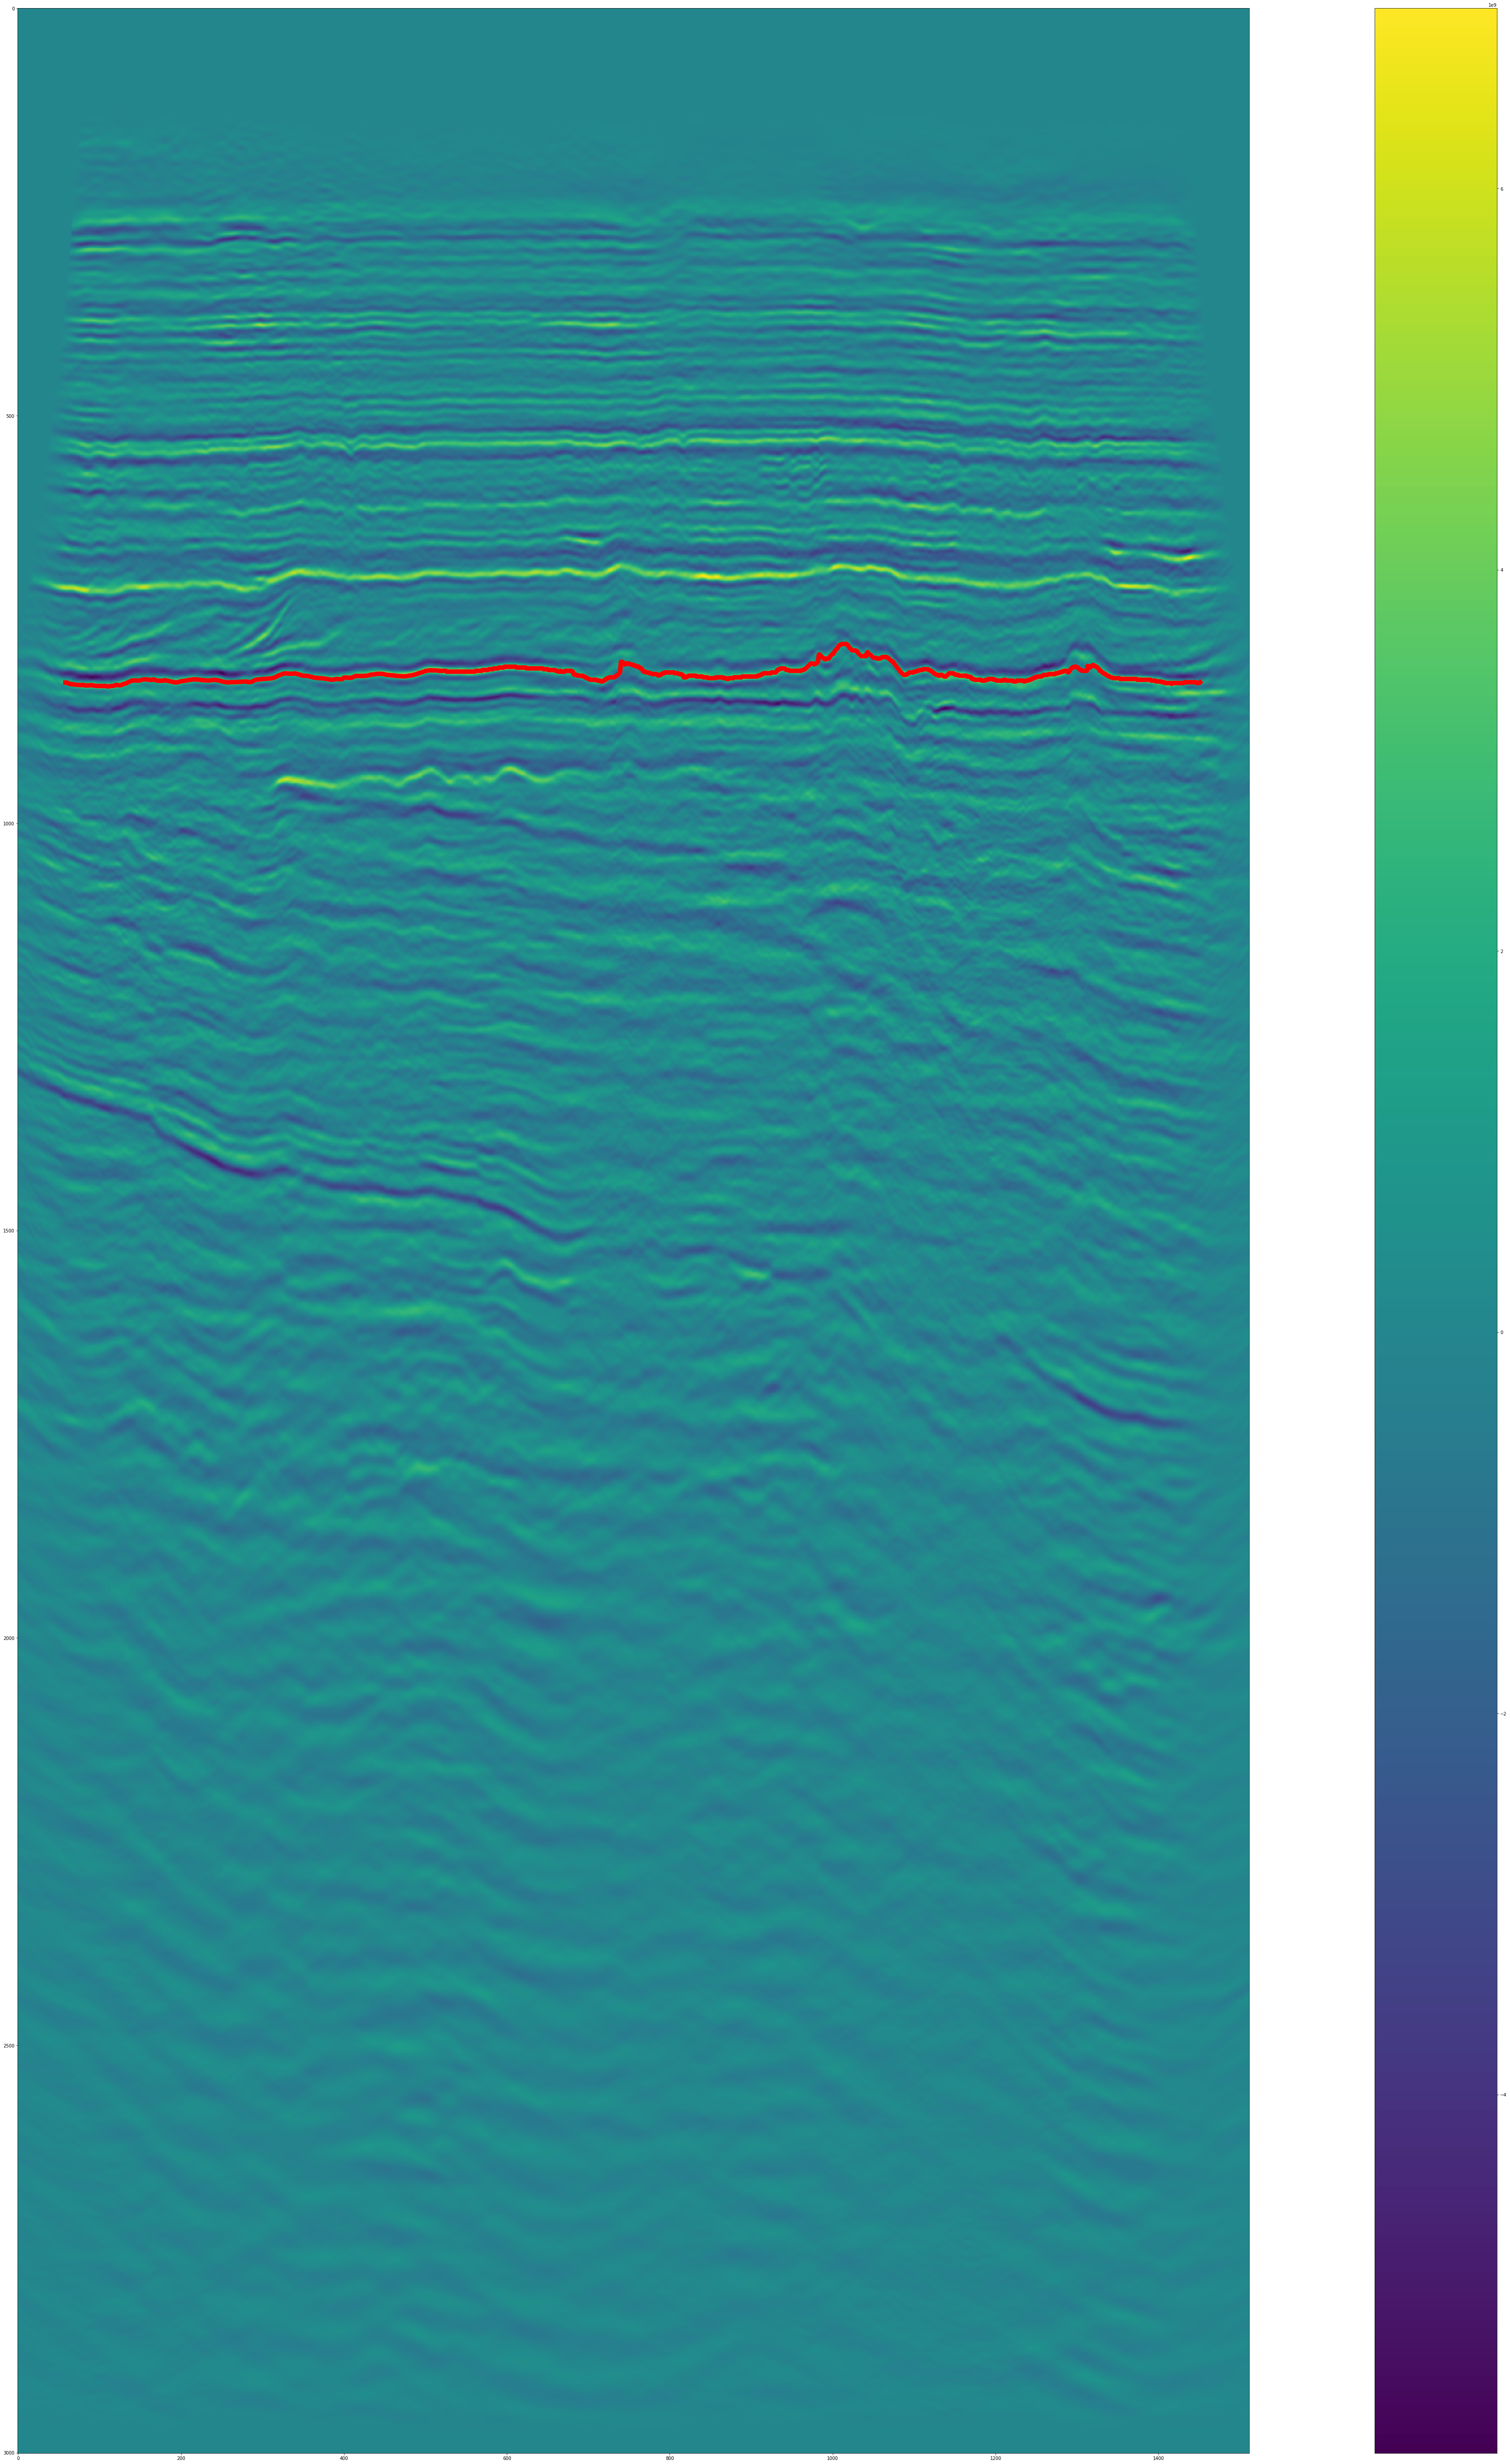

In [427]:
plt.figure(figsize=(100,100))
plt.imshow(L1dat.transpose())
plt.plot(L1res[:,0],L1res[:,2],color='red',linewidth=10)
plt.colorbar()
plt.show()

In [429]:
f = open('text.txt', 'w')
for i in L:
    f.write(str(i[0])+','+str(i[2])+'\n')
f.close()